In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/25 [>.............................] - ETA: 11s - loss: 1.3889 - accuracy: 0.2422
Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 10ms/step - loss: 1.3682 - accuracy: 0.4698 - val_loss: 1.3409 - val_accuracy: 0.5939
Epoch 2/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.3460 - accuracy: 0.5156
Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 1.3237 - accuracy: 0.4924 - val_loss: 1.2973 - val_accuracy: 0.6263
Epoch 3/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.2878 - accuracy: 0.5078
Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 1.2816 - accuracy: 0.4905 - val_loss: 1.2532 - val_accuracy: 0.6387
Epoch 4/1000
 1/25 [>.............................] -

Epoch 27/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.6568 - accuracy: 0.8047
Epoch 00027: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.5516 - accuracy: 0.8203 - val_loss: 0.3853 - val_accuracy: 0.9047
Epoch 28/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.5123 - accuracy: 0.8359
Epoch 00028: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.8193 - val_loss: 0.3707 - val_accuracy: 0.9047
Epoch 29/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.4944 - accuracy: 0.8438
Epoch 00029: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.8219 - val_loss: 0.3592 - val_accuracy: 0.9094
Epoch 30/1000
 1/25 [>.............................]

Epoch 53/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.4791 - accuracy: 0.8438
Epoch 00053: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8715 - val_loss: 0.1995 - val_accuracy: 0.9428
Epoch 54/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8516
Epoch 00054: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8769 - val_loss: 0.1988 - val_accuracy: 0.9418
Epoch 55/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.3087 - accuracy: 0.9219
Epoch 00055: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8810 - val_loss: 0.1943 - val_accuracy: 0.9428
Epoch 56/1000
 1/25 [>.............................]

Epoch 79/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8906
Epoch 00079: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.3224 - accuracy: 0.8938 - val_loss: 0.1685 - val_accuracy: 0.9476
Epoch 80/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8750
Epoch 00080: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8915 - val_loss: 0.1657 - val_accuracy: 0.9476
Epoch 81/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.4263 - accuracy: 0.8516
Epoch 00081: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8992 - val_loss: 0.1646 - val_accuracy: 0.9476
Epoch 82/1000
 1/25 [>.............................]

Epoch 105/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8984
Epoch 00105: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2988 - accuracy: 0.9030 - val_loss: 0.1450 - val_accuracy: 0.9542
Epoch 106/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8984
Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.9148 - val_loss: 0.1437 - val_accuracy: 0.9561
Epoch 107/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8750
Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.9094 - val_loss: 0.1432 - val_accuracy: 0.9561
Epoch 108/1000
 1/25 [>..........................

Epoch 131/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9141
Epoch 00131: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.9087 - val_loss: 0.1327 - val_accuracy: 0.9552
Epoch 132/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8906
Epoch 00132: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.9074 - val_loss: 0.1299 - val_accuracy: 0.9561
Epoch 133/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2638 - accuracy: 0.9062
Epoch 00133: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2596 - accuracy: 0.9141 - val_loss: 0.1282 - val_accuracy: 0.9590
Epoch 134/1000
 1/25 [>..........................

Epoch 157/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9062
Epoch 00157: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9186 - val_loss: 0.1194 - val_accuracy: 0.9600
Epoch 158/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2169 - accuracy: 0.9453
Epoch 00158: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.9173 - val_loss: 0.1195 - val_accuracy: 0.9609
Epoch 159/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062
Epoch 00159: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.9173 - val_loss: 0.1222 - val_accuracy: 0.9619
Epoch 160/1000
 1/25 [>..........................

Epoch 183/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9297
Epoch 00183: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.9230 - val_loss: 0.1118 - val_accuracy: 0.9628
Epoch 184/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9141
Epoch 00184: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.9202 - val_loss: 0.1119 - val_accuracy: 0.9619
Epoch 185/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2250 - accuracy: 0.8984
Epoch 00185: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.9154 - val_loss: 0.1103 - val_accuracy: 0.9628
Epoch 186/1000
 1/25 [>..........................

Epoch 209/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.1374 - accuracy: 0.9688
Epoch 00209: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2220 - accuracy: 0.9246 - val_loss: 0.1042 - val_accuracy: 0.9619
Epoch 210/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.1216 - accuracy: 0.9375
Epoch 00210: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.9237 - val_loss: 0.1043 - val_accuracy: 0.9619
Epoch 211/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9453
Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.9218 - val_loss: 0.1038 - val_accuracy: 0.9638
Epoch 212/1000
 1/25 [>..........................

Epoch 235/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.0906 - accuracy: 0.9688
Epoch 00235: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9208 - val_loss: 0.0995 - val_accuracy: 0.9619
Epoch 236/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.1947 - accuracy: 0.9219
Epoch 00236: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9278 - val_loss: 0.0999 - val_accuracy: 0.9609
Epoch 237/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2580 - accuracy: 0.9453
Epoch 00237: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9297 - val_loss: 0.0990 - val_accuracy: 0.9628
Epoch 238/1000
 1/25 [>..........................

Epoch 261/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9688
Epoch 00261: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2000 - accuracy: 0.9329 - val_loss: 0.0981 - val_accuracy: 0.9638
Epoch 262/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2350 - accuracy: 0.9453
Epoch 00262: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9224 - val_loss: 0.0961 - val_accuracy: 0.9638
Epoch 263/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9219
Epoch 00263: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9278 - val_loss: 0.0960 - val_accuracy: 0.9657
Epoch 264/1000
 1/25 [>..........................

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.3295554e-08 1.7407622e-02 8.6755270e-01 1.1503972e-01]
2


# 混同行列

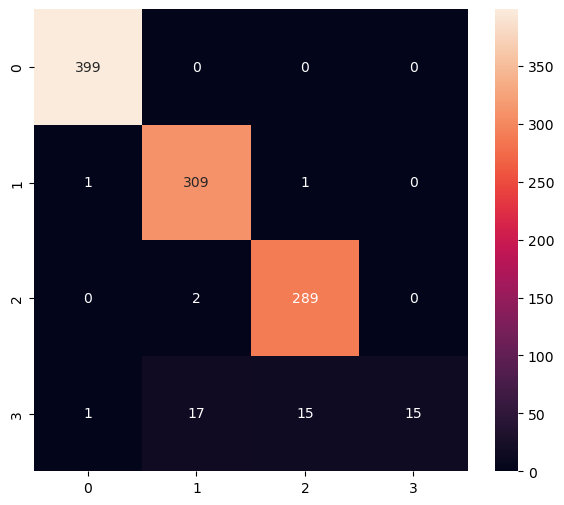

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       0.94      0.99      0.97       311
           2       0.95      0.99      0.97       291
           3       1.00      0.31      0.48        48

    accuracy                           0.96      1049
   macro avg       0.97      0.82      0.85      1049
weighted avg       0.97      0.96      0.96      1049



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6120

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3295510e-08 1.7407630e-02 8.6755270e-01 1.1503972e-01]
2
